# Drawing Conclusions Quiz
Use the space below to explore `store_data.csv` to answer the quiz questions below.

In [177]:
# imports and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('store_data.csv')

In [178]:
# explore data
df.head()

,week,storeA,storeB,storeC,storeD,storeE
0,2014-05-04,2643,8257,3893,6231,1294
1,2014-05-11,6444,5736,5634,7092,2907
2,2014-05-18,9646,2552,4253,5447,4736
3,2014-05-25,5960,10740,8264,6063,949
4,2014-06-01,7412,7374,3208,3985,3023


In [138]:
df.nunique()

week      200
storeA    196
storeB    196
storeC    193
storeD    193
storeE    193
dtype: int64

In [139]:
df.describe()

,storeA,storeB,storeC,storeD,storeE
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,5865.480000,6756.710000,4942.105000,5431.405000,2580.025000
std,2958.230318,3601.339489,1325.407768,1183.111323,1725.651381
min,137.000000,14.000000,927.000000,2276.000000,39.000000
25%,3812.250000,3884.500000,4053.500000,4717.000000,1235.000000
50%,5713.500000,6771.000000,4962.500000,5382.000000,2522.000000
75%,7662.250000,9350.500000,5801.750000,6243.750000,3574.250000
max,14403.000000,15841.000000,8293.000000,8190.000000,7553.000000


array([[<AxesSubplot:title={'center':'storeA'}>,
        <AxesSubplot:title={'center':'storeB'}>],
       [<AxesSubplot:title={'center':'storeC'}>,
        <AxesSubplot:title={'center':'storeD'}>],
       [<AxesSubplot:title={'center':'storeE'}>, <AxesSubplot:>]],
      dtype=object)

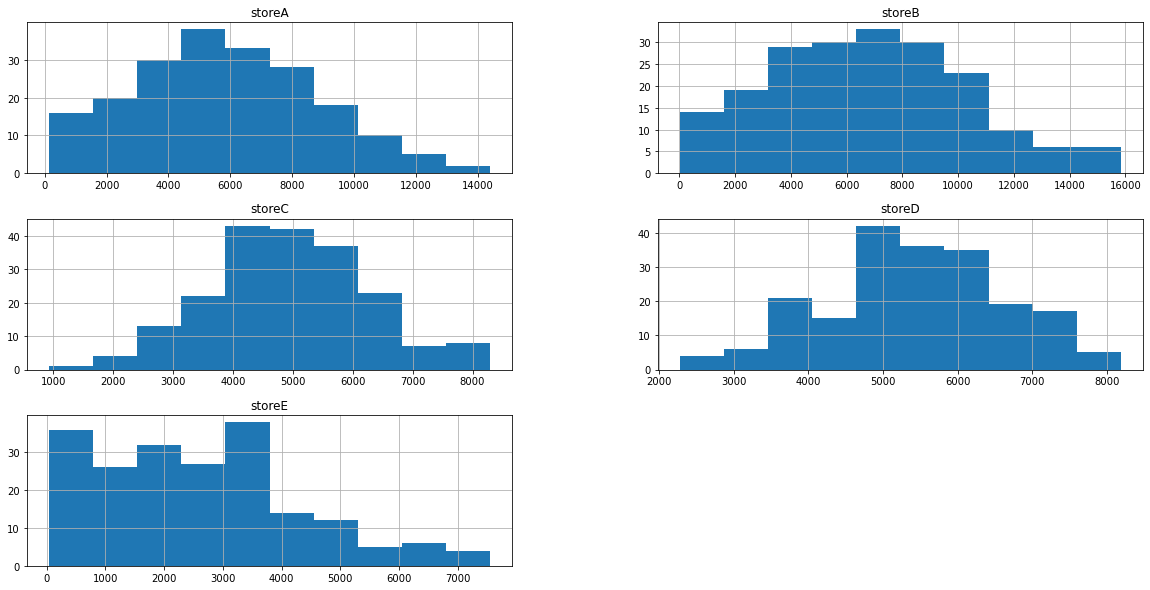

In [140]:
df.hist(figsize=(20,10))

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   week    200 non-null    object
 1   storeA  200 non-null    int64 
 2   storeB  200 non-null    int64 
 3   storeC  200 non-null    int64 
 4   storeD  200 non-null    int64 
 5   storeE  200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [142]:
# total sales for the last month
df.index = pd.to_datetime(df['week'])
df.drop(['week'], axis=1, inplace=True)

Total last month:  96739


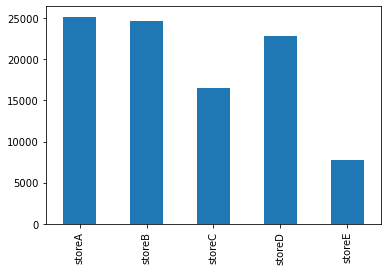

In [145]:
monthly_sales = df.groupby(by=[df.index.year, df.index.month]).sum()
total_last_month = monthly_sales.iloc[-1].sum()
monthly_sales.iloc[-1].plot(kind='bar')
print('Total last month: ', total_last_month)

Avg sales:  5115.145


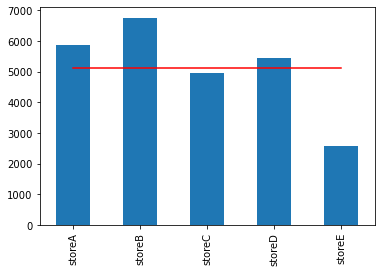

In [157]:
# average sales
ax = df.mean().plot(kind='bar', )
x = np.arange(len(df.columns))
y = 0 * x + df.values.mean()
ax.plot(x, y, color='r')
print('Avg sales: ', df.values.mean())

In [159]:
# sales on march 13, 2016
print('Sales on march 13, 2016:', df.loc['2016-03-13'].sum())

Sales on march 13, 2016: 16605


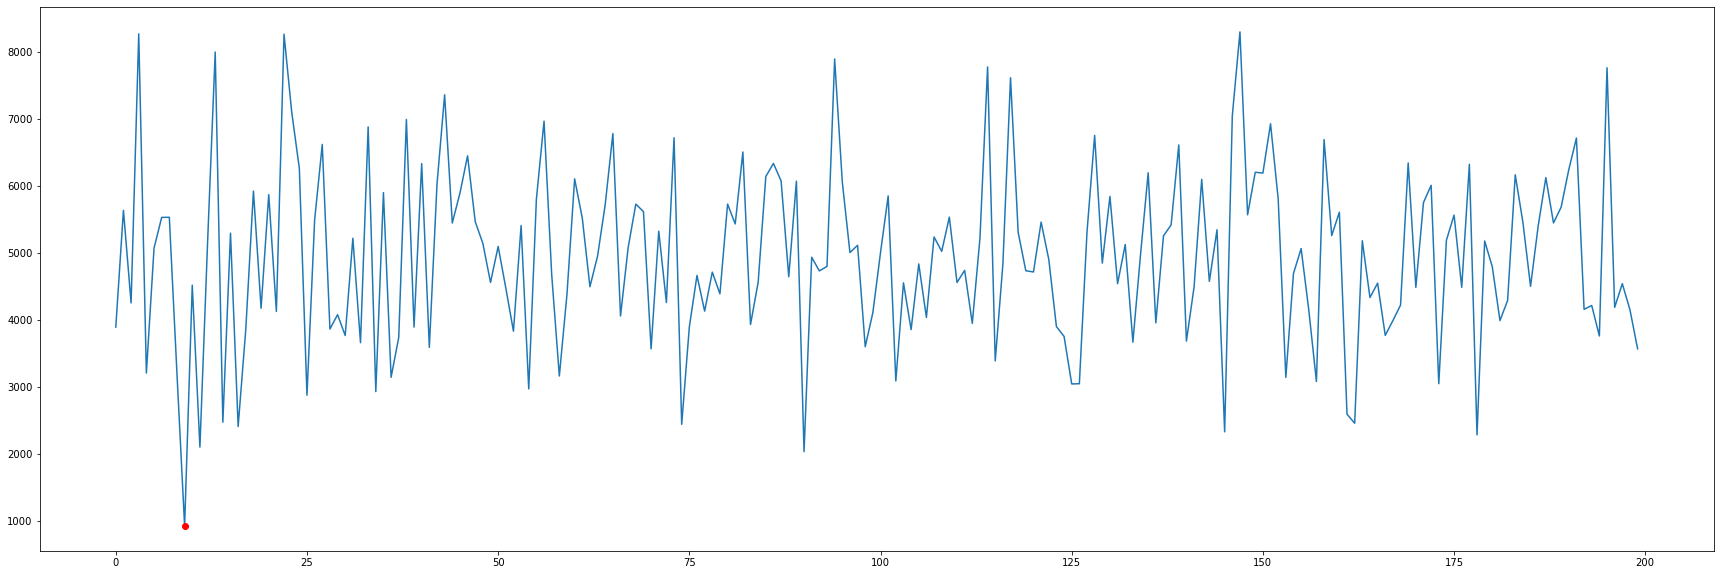

In [192]:
# worst week for store C
fig, ax = plt.subplots()
index = df[df['storeC'] == df['storeC'].min()].index
df['storeC'].plot(kind='line', figsize=(30, 10), ax=ax)
ax.plot(index, df['storeC'].min(), 'or')

In [193]:
# total sales during most recent 3 month period
last_3_month = monthly_sales.iloc[-3:]
display(last_3_month)
print('total sales during most recent 3 month period', last_3_month.values.sum())

storeA  storeB  storeC  storeD  storeE
week week                                        
2017 12     40688   29151   30198   28422    8509
2018 1      21776   25648   19893   23985   11038
     2      25127   24595   16447   22783    7787

total sales during most recent 3 month period 336047
